


# Project 2: Ames Housing Project Suggestions
<br>

# **Problem Statement:**

**There is a need to identify the best redevelopment opportunities in the Ames Housing Area that would allow more efficient use of limited resources (time, energy, money), ensuring the best focus of funds between competing uses.**

**The proposed factors, based on data analytics, hopes to provide a clearer strategy to increase potential ROI and inspire greater confidence in investment partners.**

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,Lasso,Ridge
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import Imputer, PolynomialFeatures,StandardScaler
import sklearn.metrics as metrics
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [140]:
ames=pd.read_csv('./datasets/train.csv')
ames_test=pd.read_csv('./datasets/test.csv')

FileNotFoundError: [Errno 2] File ./datasets/train.csv does not exist: './datasets/train.csv'

In [3]:
df=pd.DataFrame(ames)
df_test=pd.DataFrame(ames_test)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

# Examining the Train Set Data
---


In [5]:
df.head(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,247.0,Rec,713.0,557.0,1517.0,GasA,Ex,Y,SBrkr,1888,0,0,1888,0.0,0.0,2,1,2,1,Gd,6,Mod,1,Gd,Attchd,1966.0,Fin,2.0,578.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SFoyer,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,82.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547.0,Unf,0.0,0.0,547.0,GasA,Gd,Y,SBrkr,1072,0,0,1072,1.0,0.0,2,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2.0,525.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1952.0,Unf,1.0,420.0,TA,TA,Y,

**Creating a function that identifies NaNs in non-numeric columns**


In [6]:
def check_cols(df):
    check_cols=df.select_dtypes([np.object]).columns
    for col in check_cols:
        n_nan=df[col].isnull().sum()
        if n_nan>0:
            print("{} has {} NaNs".format(col,n_nan))
            
    return

pd.DataFrame(check_cols(df))

Alley has 1911 NaNs
Mas Vnr Type has 22 NaNs
Bsmt Qual has 55 NaNs
Bsmt Cond has 55 NaNs
Bsmt Exposure has 58 NaNs
BsmtFin Type 1 has 55 NaNs
BsmtFin Type 2 has 56 NaNs
Fireplace Qu has 1000 NaNs
Garage Type has 113 NaNs
Garage Finish has 114 NaNs
Garage Qual has 114 NaNs
Garage Cond has 114 NaNs
Pool QC has 2042 NaNs
Fence has 1651 NaNs
Misc Feature has 1986 NaNs


""


**Creating a function that identifies NaNs in numeric columns**

In [7]:
def check_cols(df):
    check_cols=df.select_dtypes([np.float, np.int]).columns
    for col in check_cols:
        n_nan=df[col].isnull().sum()
        if n_nan>0:
            print("{} has {} NaNs".format(col,n_nan))
            
    return

pd.DataFrame(check_cols(ames))

Lot Frontage has 330 NaNs
Mas Vnr Area has 22 NaNs
BsmtFin SF 1 has 1 NaNs
BsmtFin SF 2 has 1 NaNs
Bsmt Unf SF has 1 NaNs
Total Bsmt SF has 1 NaNs
Bsmt Full Bath has 2 NaNs
Bsmt Half Bath has 2 NaNs
Garage Yr Blt has 114 NaNs
Garage Cars has 1 NaNs
Garage Area has 1 NaNs


""


**We have a sizeable dataset with 2051 rows and 264 columns in our train data set and 879 rows and 251 columns in our test data set.**

In [8]:
df.shape

(2051, 81)

In [9]:
df_test.shape

(879, 80)

**Data Dictionary**
---

We refer to the data dictionary to examine the meaning of the missing values. We reference the original csv file and note that the majority of NaN values do not represent absent data but are variables that do not apply to these houses. E.g. 1911 NaNs in 'Alley' represent that 1911 houses have no alley access.
Similarly, 2042 NaNs in 'Pool QC' represents that 2042 houses do not have a pool. 
<br>
<br>


| Name                                      | data type | Description                                                                                                         | 
|-------------------------------------------|-----------|----------------------------------------------------------------------------------------------------------------------| 
| id                                        | int64     | ID Index Number                                                                                                      | 
| pid                                       | int64     | PID (Nominal): Parcel identification number  - can be used with city web site for parcel review.                     | 
| lot_frontage                              | float64   | Lot Frontage (Continuous): Linear feet of street connected to property                                               | 
| lot_area                                  | int64     | Lot Area (Continuous): Lot size in square feet                                                                       | 
| lot_shape                                 | object    | Lot Shape (Ordinal): General shape of property                                                                       | 
| overall_qual                              | int64     | Overall Qual (Ordinal): Rates the overall material and finish of the house                                           | 
| overall_cond                              | int64     | Overall Cond (Ordinal): Rates the overall condition of the house                                                     | 
| year_built                                | int64     | Year Built (Discrete): Original construction date                                                                    | 
| year_remod                            | int64     | Year Remod/Add (Discrete): Remodel date (same as construction date if no remodeling or additions)                    | 
| mas_vnr_area                              | float64   | Mas Vnr Type (Nominal): Masonry veneer type                                                                          | 
| exter_qual                                | int64     | Exter Qual (Ordinal): Evaluates the quality of the material on the exterior                                          | 
| exter_cond                                | int64     | Exter Cond (Ordinal): Evaluates the present condition of the material on the exterior                                | 
| foundation                                | object    | Foundation (Nominal): Type of foundation                                                                             | 
| bsmt_qual                                 | float64   | Bsmt Qual (Ordinal): Evaluates the height of the basement                                                            | 
| bsmt_cond                                 | float64   | Bsmt Cond (Ordinal): Evaluates the general condition of the basement                                                 | 
| bsmt_exposure                             | float64   | Bsmt Exposure (Ordinal): Refers to walkout or garden level walls                                                     | 
| bsmtfin_type_1                            | object    | (Ordinal): Rating of basement finished area                                                                          | 
| bsmtfin_sf_1                              | float64   | BsmtFin SF 1 (Continuous): Type 1 finished square feet                                                               | 
| bsmtfin_type_2                            | object    | BsmtFinType 2 (Ordinal): Rating of basement finished area (if multiple types)                                        | 
| bsmtfin_sf_2                              | float64   | BsmtFin SF 2 (Continuous): Type 2 finished square feet                                                               | 
| bsmt_unf_sf                               | float64   | Bsmt Unf SF (Continuous): Unfinished square feet of basement area                                                    | 
| total_bsmt_sf                             | float64   | Total Bsmt SF (Continuous): Total square feet of basement area                                                       | 
| heating                                   | object    | Heating (Nominal):Type of heating                                                                                    | 
| heating_qc                                | int64     | HeatingQC (Ordinal): Heating quality and condition                                                                   | 
| central_air                               | int64     | Central Air (Nominal): Central air                                                                                   | 
| electrical                                | object    | Electrical (Ordinal): Electrical system                                                                              | 
| first_flr_sf                                | int64     | 1st Flr SF (Continuous): First Floor square feet                                                                     | 
| second_flr_sf                                | int64     | 2nd Flr SF (Continuous)                                                                                              | 
| low_qual_fin_sf                           | int64     | Low Qual Fin SF (Continuous): Low quality finished square feet (all floors)                                          | 
| gr_liv_area                               | int64     | Gr Liv Area (Continuous): Above grade (ground) living area square feet                                               | 
| bsmt_full_bath                            | float64   | Bsmt Full Bath (Discrete): Basement full bathrooms                                                                   | 
| bsmt_half_bath                            | float64   | Bsmt Half Bath (Discrete): Basement half bathrooms                                                                   | 
| full_bath                                 | int64     | Full Bath (Discrete): Full bathrooms above grade                                                                     | 
| half_bath                                 | int64     | Half Bath (Discrete): Half baths above grade                                                                         | 
| kitchen_qual                              | int64     | itchenQual (Ordinal): Kitchen quality                                                                                | 
| totrms_abvgrd                             | int64     | TotRmsAbvGrd                                                                                                         | 
| functional                                | object    | Functional (Ordinal): Home functionality (Assume typical unless deductions are warranted)                            | 
| fireplaces                                | int64     | Fireplaces (Discrete): Number of fireplaces                                                                          | 
| fireplace_qu                              | float64   | FireplaceQu (Ordinal): Fireplace quality                                                                             | 
| garage_type                               | object    | Garage Type (Nominal): Garage location                                                                               | 
| garage_yr_blt                             | float64   | Garage Yr Blt (Discrete): Year garage was built                                                                      | 
| garage_finish                             | float64   | Garage Finish (Ordinal)                                                                                              | 
| garage_cars                               | float64   | Garage Cars (Discrete): Size of garage in car capacity                                                               | 
| garage_area                               | float64   | Garage Area (Continuous): Size of garage in square feet                                                              | 
| garage_qual                               | float64   | Garage Qual (Ordinal): Garage quality                                                                                | 
| garage_cond                               | float64   | Garage Cond (Ordinal): Garage condition                                                                              | 
| paved_drive                               | object    | Paved Drive (Ordinal): Paved driveway                                                                                | 
| wood_deck_sf                              | int64     | Wood Deck SF (Continuous): Wood deck area in square feet                                                             | 
| open_porch_sf                             | int64     | Open Porch SF (Continuous): Open porch area in square feet                                                           | 
| enclosed_porch                            | int64     | Enclosed Porch (Continuous): Enclosed porch area in square feet                                                      | 
| 3ssn_porch                                | int64     | 3-Ssn Porch (Continuous): Three season porch area in square feet                                                     | 
| screen_porch                              | int64     | Screen Porch (Continuous): Screen porch area in square feet                                                          | 
| pool_area                                 | int64     | Pool Area (Continuous): Pool area in square feet                                                                     | 
| pool_qc                                   | float64   | Pool QC (Ordinal): Pool quality                                                                                      | 
| fence                                     | object    | Fence (Ordinal): Fence quality                                                                                       | 
| misc_feature                              | object    | Misc Feature (Nominal): Miscellaneous feature not covered in other categories                                        | 
| misc_val                                  | int64     | Misc Val (Continuous): $Value of miscellaneous feature                                                               | 
| mo_sold                                   | int64     | Mo Sold (Discrete): Month Sold (MM)                                                                                  | 
| yr_sold                                   | int64     | Yr Sold (Discrete): Year Sold (YYYY)                                                                                 | 
| sale_type                                 | object    | Sale Type (Nominal): Type of sale                                                                                    | 
| saleprice                                 | int64     | SalePrice (Continuous): Sale price $$                                                                                | 
| ms_subclass_20                            | uint8     | 1-STORY 1946 & NEWER ALL STYLES                                                                                      | 
| ms_subclass_30                            | uint8     | 1-STORY 1945 & OLDER                                                                                                 | 
| ms_subclass_40                            | uint8     | 1-STORY W/FINISHED ATTIC ALL AGES                                                                                    | 
| ms_subclass_45                            | uint8     | 1-1/2 STORY - UNFINISHED ALL AGES                                                                                    | 
| ms_subclass_50                            | uint8     | 1-1/2 STORY FINISHED ALL AGES                                                                                        | 
| ms_subclass_60                            | uint8     | 2-STORY 1946 & NEWER                                                                                                 | 
| ms_subclass_70                            | uint8     | 2-STORY 1945 & OLDER                                                                                                 | 
| ms_subclass_75                            | uint8     | 2-1/2 STORY ALL AGES                                                                                                 | 
| ms_subclass_80                            | uint8     | SPLIT OR MULTI-LEVEL                                                                                                 | 
| ms_subclass_85                            | uint8     | SPLIT FOYER                                                                                                          | 
| ms_subclass_90                            | uint8     | DUPLEX - ALL STYLES AND AGES                                                                                         | 
| ms_subclass_120                           | uint8     | 1-STORY PUD (Planned Unit Development) - 1946 & NEWER                                                                | 
| ms_subclass_150                           | uint8     | 1-1/2 STORY PUD - ALL AGES                                                                                           | 
| ms_subclass_160                           | uint8     | 2-STORY PUD - 1946 & NEWER                                                                                           | 
| ms_subclass_180                           | uint8     | PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                                                                              | 
| ms_subclass_190                           | uint8     | 2 FAMILY CONVERSION - ALL STYLES AND AGES                                                                            | 
| ms_zoning_A (agr)                         | uint8     |        A - Agriculture                                                                                               | 
| ms_zoning_C (all)                         | uint8     |        C - Commercial                                                                                                | 
| ms_zoning_FV                              | uint8     |        FV - Floating Village Residential                                                                             | 
| ms_zoning_I (all)                         | uint8     |        I - Industrial                                                                                                | 
| ms_zoning_RH                              | uint8     |        RH -Residential High Density                                                                                  | 
| ms_zoning_RL                              | uint8     |        RL -Residential Low Density                                                                                   | 
| ms_zoning_RM                              | uint8     |        RM -Residential Medium Density                                                                                | 
| street_Grvl                               | uint8     | Street (Nominal): Type of road access to property (gravel)                                                           | 
| street_Pave                               | uint8     | Street (Nominal): Type of road access to property (pavement)                                                         | 
| alley_Grvl                                | uint8     | Alley (Nominal): Type of alley access to property (gravel)                                                           | 
| alley_Pave                                | uint8     | Alley (Nominal): Type of alley access to property(paved)                                                             | 
| land_contour_Bnk                          | uint8     | Land Contour (Nominal): Flatness of the property (Banked - Quick and significant rise from street grade to building) | 
| land_contour_HLS                          | uint8     | Land Contour (Nominal): Flatness of the property (Hillside - Significant slope from side to side)                    | 
| land_contour_Low                          | uint8     | Land Contour (Nominal): Flatness of the property (Depression)                                                        | 
| land_contour_Lvl                          | uint8     | Land Contour (Nominal): Flatness of the property                                                                     | 
| utilities_AllPub                          | uint8     | Utilities (Ordinal): Type of utilities available (All public Utilities (E,G,W,& S))                                  | 
| utilities_NoSeWa                          | uint8     | Utilities (Ordinal): Type of utilities available(Electricity, Gas, and Water (Septic Tank)                           | 
| utilities_NoSewr                          | uint8     | Utilities (Ordinal): Type of utilities available (Electricity and Gas Only)                                          | 
| lot_config_Corner                         | uint8     | Lot Config (Nominal): Lot configuration(Corner lot)                                                                  | 
| lot_config_CulDSac                        | uint8     | Lot Config (Nominal): Lot configuration(Cul-de-sac)                                                                  | 
| lot_config_FR2                            | uint8     | Lot Config (Nominal): Lot configuration(Frontage on 2 sides of property)                                             | 
| lot_config_FR3                            | uint8     | Lot Config (Nominal): Lot configuration(Frontage on 3 sides of property)                                             | 
| lot_config_Inside                         | uint8     | Lot Config (Nominal): Lot configuration(Inside lot)                                                                  | 
| land_slope_1                              | uint8     | Land Slope (Ordinal): Slope of property(Gentle slope)                                                                | 
| land_slope_2                              | uint8     | Land Slope (Ordinal): Slope of property(Moderate Slope)                                                              | 
| land_slope_3                              | uint8     | Land Slope (Ordinal): Slope of property(Severe Slope)                                                                | 
| neighborhood_Blmngtn                      | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits ( Bloomington Heights)                            | 
| neighborhood_Blueste                      | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (Bluestem)                                        | 
| neighborhood_BrDale                       | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (Briardale)                                       | 
| neighborhood_BrkSide                      | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (Brookside)                                       | 
| neighborhood_ClearCr                      | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (Clear Creek)                                     | 
| neighborhood_CollgCr                      | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (College Creek)                                   | 
| neighborhood_Crawfor                      | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (Crawford)                                        | 
| neighborhood_Edwards                      | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (Edwards)                                         | 
| neighborhood_Gilbert                      | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (Gilbert)                                         | 
| neighborhood_Greens                       | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (Greens)                                          | 
| neighborhood_GrnHill                      | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (Green Hills)                                     | 
| neighborhood_IDOTRR                       | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (Iowa DOT and Rail Road)                          | 
| neighborhood_Landmrk                      | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (Landmark)                                        | 
| neighborhood_MeadowV                      | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (Meadow Village)                                  | 
| neighborhood_Mitchel                      | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (Mitchell)                                        | 
| neighborhood_NAmes                        | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (North Ames)                                      | 
| neighborhood_NPkVill                      | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (Northpark Villa)                                 | 
| neighborhood_NWAmes                       | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (Northwest Ames)                                  | 
| neighborhood_NoRidge                      | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (Northridge)                                      | 
| neighborhood_NridgHt                      | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (Northridge Height)                               | 
| neighborhood_OldTown                      | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (Old Town)                                        | 
| neighborhood_SWISU                        | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (South & West of Iowa State University)           | 
| neighborhood_Sawyer                       | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (Sawyer)                                          | 
| neighborhood_SawyerW                      | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (Sawyer West)                                     | 
| neighborhood_Somerst                      | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (Somerset)                                        | 
| neighborhood_StoneBr                      | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (Stone Brook)                                     | 
| neighborhood_Timber                       | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (Timberland)                                      | 
| neighborhood_Veenker                      | uint8     | Neighborhood (Nominal): Physical locations within Ames city limits (Veenker)                                         | 
| proximity_to_transport_Artery             | uint8     | Adjacent to arterial street                                                                                          | 
| proximity_to_transport_Feedr              | uint8     | Adjacent to feeder street                                                                                            | 
| proximity_to_transport_Norm               | uint8     | Normal                                                                                                               | 
| proximity_to_transport_PosA               | uint8     | Adjacent to postive off-site feature                                                                                 | 
| proximity_to_transport_PosN               | uint8     | Near positive off-site feature--park, greenbelt, etc.                                                                | 
| proximity_to_transport_RRAe               | uint8     | Adjacent to East-West Railroad                                                                                       | 
| proximity_to_transport_RRAn               | uint8     | Within 200' of North-South Railroad                                                                                  | 
| proximity_to_transport_RRNe               | uint8     | Within 200' of East-West Railroad                                                                                    | 
| proximity_to_transport_RRNn               | uint8     | Adjacent to North-South Railroad                                                                                     | 
| proximity_to_more_than_1_transport_Artery | uint8     | Adjacent to arterial street                                                                                          | 
| proximity_to_more_than_1_transport_Feedr  | uint8     | Adjacent to feeder street                                                                                            | 
| proximity_to_more_than_1_transport_Norm   | uint8     | Normal                                                                                                               | 
| proximity_to_more_than_1_transport_PosA   | uint8     | Adjacent to postive off-site feature                                                                                 | 
| proximity_to_more_than_1_transport_PosN   | uint8     | Near positive off-site feature--park, greenbelt, etc.                                                                | 
| proximity_to_more_than_1_transport_RRAe   | uint8     | Adjacent to East-West Railroad                                                                                       | 
| proximity_to_more_than_1_transport_RRAn   | uint8     | Adjacent to North-South Railroad                                                                                     | 
| proximity_to_more_than_1_transport_RRNn   | uint8     | Within 200' of North-South Railroad                                                                                  | 
| bldg_type_1Fam                            | uint8     | Bldg Type (Nominal): Type of dwelling (Single-family Detached)                                                       | 
| bldg_type_2fmCon                          | uint8     | Bldg Type (Nominal): Type of dwelling (Two-family Conversion; originally built as one-family dwelling)               | 
| bldg_type_Duplex                          | uint8     | Bldg Type (Nominal): Type of dwelling (Duplex)                                                                       | 
| bldg_type_Twnhs                           | uint8     | Bldg Type (Nominal): Type of dwelling (Townhouse End Unit)                                                           | 
| bldg_type_TwnhsE                          | uint8     | Bldg Type (Nominal): Type of dwelling (Townhouse Inside Unit)                                                        | 
| house_style_1.5Fin                        | uint8     | House Style (Nominal): Style of dwelling                                                                             | 
| house_style_1.5Unf                        | uint8     | House Style (Nominal): Style of dwelling                                                                             | 
| house_style_1Story                        | uint8     | House Style (Nominal): Style of dwelling                                                                             | 
| house_style_2.5Fin                        | uint8     | House Style (Nominal): Style of dwelling                                                                             | 
| house_style_2.5Unf                        | uint8     | House Style (Nominal): Style of dwelling                                                                             | 
| house_style_2Story                        | uint8     | House Style (Nominal): Style of dwelling                                                                             | 
| house_style_SFoyer                        | uint8     | House Style (Nominal): Style of dwelling                                                                             | 
| house_style_SLvl                          | uint8     | House Style (Nominal): Style of dwelling   

| 


**Identifying Variable Types**

In [10]:
pd.DataFrame(df.dtypes, columns=['DataType'])

,DataType
Id,int64
PID,int64
MS SubClass,int64
MS Zoning,object
Lot Frontage,float64
Lot Area,int64
Street,object
Alley,object
Lot Shape,object
Land Contour,object


# Data Transformation of Train Set
---


Mandatory transformations for data compatibility were carried out, such as including converting non-numeric features to numeric.Quality transformations were also carried out, such as lowercasing of text features and normalizing of numeric features (use of log scale) were also carried out to help the model perform better.


**Underscoring and Lowercasing for Text Features**

In [11]:
#We convert space characters to be underscored and lowercase to avoid technical issues when coding
#To view all columns:
#pd.options.display.max_columns= None

df.columns = [x.strip().replace(' ', '_') for x in df.columns.str.lower()]


**Renaming the Columns**

In [12]:
#We rename condition_1 and condition_2 and for greater clarity
df.rename(columns={'condition_1':'proximity_to_transport'}, inplace=True)
df.rename(columns={'condition_2':'proximity_to_more_than_1_transport'},inplace=True)
df.rename(columns={'year_remod/add':'year_remod'},inplace=True)
df.rename(columns={'1st_flr_sf':'first_flr_sf'},inplace=True)
df.rename(columns={'2nd_flr_sf':'second_flr_sf'},inplace=True)


**Creating a function that changes the NaNs in numeric columns to the value 0**

In [13]:
val=0
def clean_data(col,val):
    numeric_cols=df.select_dtypes([np.int64,np.float64,np.uint64]).columns
    ames[numeric_cols]=df[numeric_cols].fillna(val)
    
    return

**Converting Ordinal Non-numeric Features into Numeric**

In [17]:
df['exter_qual'] = df['exter_qual'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
df['exter_cond'] = df['exter_cond'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
df['kitchen_qual'] = df['kitchen_qual'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
df['bsmt_qual'] = df['bsmt_qual'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
df['heating_qc'] = df['heating_qc'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
df['fireplace_qu'] = df['fireplace_qu'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
df['garage_qual'] = df['garage_qual'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
df['garage_cond'] = df['garage_cond'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
df['bsmt_cond'] = df['bsmt_cond'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
df['pool_qc'] = df['pool_qc'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
df['land_slope'] = df['land_slope'].apply({'Gtl' : 3,'Mod' : 2,'Sev' : 1,'0'  : 0 }.get)
df['bsmt_exposure'] = df['bsmt_exposure'].apply({'Gd' : 4,'Av' : 3,'Mn' : 2,'No' : 1,'0' : 0 }.get)
df['garage_finish'] = df['garage_finish'].apply({'Fin' : 3, 'RFn' : 2,'Unf' : 1,'0' : 0 }.get)
df['central_air'] = df['central_air'].apply({'Y' : 1,'N' : 0 }.get)


**Replacing NA/NaNs with 0 Value (Train Set)**

These NaNs and their rows have not been removed as we interpret the integrity of this absent data as sound 
and fairly accurate as they represent absence of that variable which relates to the respective houses, 
rather than incomplete entries.  

_Items:
lot frontage,alley,fireplace quality, pool quality,fence and miscellenous features, masonry veneer type, 
masonry veneer area, basement quality, basement condition, basement exposure, basement finished type 1, 
basement finished type 2,garage type, garage year built, garage finish,garage quality and garage condition._

In [18]:
replace_list_zero=['lot_frontage','alley','fireplace_qu', 'pool_qc','fence','misc_feature','mas_vnr_type','bsmt_qual',
                  'bsmt_cond','bsmt_exposure','bsmtfin_type_1', 'bsmtfin_type_2','garage_type','garage_yr_blt','garage_finish',
                  'garage_qual','garage_cond']

for i in replace_list_zero:
    df[i].fillna(0,inplace=True)



    # df['lot_frontage'].fillna(0, inplace=True)
# df['alley'].fillna(0, inplace=True)
# df['fireplace_qu'].fillna(0, inplace=True)
# df['pool_qc'].fillna(0, inplace=True)
# df['fence'].fillna(0, inplace=True)
# df['misc_feature'].fillna(0, inplace=True)
# df['mas_vnr_type'].fillna(0, inplace=True)
# df['mas_vnr_area'].fillna(0, inplace=True)
# df['bsmt_qual'].fillna(0, inplace=True)
# df['bsmt_cond'].fillna(0, inplace=True)
# df['bsmt_exposure'].fillna(0, inplace=True)
# df['bsmtfin_type_1'].fillna(0, inplace=True)
# df['bsmtfin_type_2'].fillna(0, inplace=True)
# df['garage_type'].fillna(0, inplace=True)
# df['garage_yr_blt'].fillna(0, inplace=True)
# df['garage_finish'].fillna(0, inplace=True)
# df['garage_qual'].fillna(0, inplace=True)
# df['garage_cond'].fillna(0, inplace=True)

**Checking the Data**

In [19]:
df.head(100)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,proximity_to_transport,proximity_to_more_than_1_transport,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,first_flr_sf,second_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0.0,13517,Pave,0,IR1,Lvl,AllPub,CulDSac,None,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,None,None,CBlock,0,0,0,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,None,None,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,None,6,Typ,0,0,Attchd,1976.0,0,2.0,475.0,0,0,Y,0,44,0,0,0,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,0,IR1,Lvl,AllPub,CulDSac,None,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,None,None,PConc,0,0,0,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,None,None,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,None,8,Typ,1,0,Attchd,1997.0,0,2.0,559.0,0,0,Y,0,74,0,0,0,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,0,Reg,Lvl,AllPub,Inside,None,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,None,None,CBlock,0,0,0,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,None,None,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,None,5,Typ,0,0,Detchd,1953.0,0,1.0,246.0,0,0,Y,0,52,0,0,0,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,0,Reg,Lvl,AllPub,Inside,None,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,None,None,PConc,0,0,0,Unf,0.0,Unf,0.0,384.0,384.0,GasA,None,None,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,None,7,Typ,0,0,BuiltIn,2007.0,0,2.0,400.0,0,0,Y,100,0,0,0,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,0,IR1,Lvl,AllPub,Inside,None,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,None,None,PConc,0,0,0,Unf,0.0,Unf,0.0,676.0,676.0,GasA,None,None,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,None,6,Typ,0,0,Detchd,1957.0,0,2.0,484.0,0,0,N,0,59,0,0,0,0,0,0,0,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,0,IR1,Lvl,AllPub,Corner,None,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,None,None,CBlock,0,0,0,ALQ,247.0,Rec,713.0,557.0,1517.0,GasA,None,None,SBrkr,1888,0,0,1888,0.0,0.0,2,1,2,1,None,6,Mod,1,0,Attchd,1966.0,0,2.0,578.0,0,0,Y,0,0,0,0,0,0,0,0,0,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,0,Reg,Lvl,AllPub,Inside,None,Edwards,Norm,Norm,TwnhsE,SFoyer,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,82.0,None,None,PConc,0,0,0,GLQ,547.0,Unf,0.0,0.0,547.0,GasA,None,None,SBrkr,1072,0,0,1072,1.0,0.0,2,0,2,1,None,5,Typ,0,0,Basment,2005.0,0,2.0,525.0,0,0,Y,0,44,0,0,0,0,0,0,0,0,6,2006,New,140000
7,145,535154050,20,RL,0.0,12160,Pave,0,IR1,Lvl,AllPub,Inside,None,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,None,None,CBlock,0,0,0,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,None,None,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,None,6,Typ,0,0,Attchd,1959.0,0,2.0,531.0,0,0,Y,0,0,0,0,0,0,0,MnPrv,0,0,5,2010,COD,142000
8,1942,535353130,20,RL,0.0,15783,Pave,0,Reg,Lvl,AllPub,Inside,None,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,None,None,CBlock,0,0,0,Rec,292.0,Unf,0.0,632.0,924.0,GasA,None,None,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,None,6,Typ,0,0,Detchd,1952.0,0,1.0,420.0,0,0,Y,

**Identifying categorical data in test set that needs to be converted with dummies**

In [20]:
#We identify categorical (non 'quality' or ranking) data that needs to be converted with dummies
todummy_list=['ms_subclass','ms_zoning','street','alley','land_contour','utilities',
              'lot_config','land_slope','neighborhood','proximity_to_transport',
              'proximity_to_more_than_1_transport',
              'bldg_type','house_style', 'roof_style','roof_matl','exterior_1st',
              'exterior_2nd','mas_vnr_type','lot_shape','foundation','bsmtfin_type_1',
              'bsmtfin_type_2','heating','electrical','functional','garage_type','paved_drive',
              'fence','sale_type']



**Creating a function that uses get_dummies to assign numerical values for each NA column in test set**

In [21]:

def dummy_df(df,todummy_list):
    for x in todummy_list:
        dummies=pd.get_dummies(df[x],prefix=x,dummy_na=False)
        df=df.drop(x,1)
        df=pd.concat([df,dummies],axis=1)
    return df
    

In [22]:
df= dummy_df(df,todummy_list)
print(df.head(10))

     id        pid  lot_frontage  lot_area  overall_qual  overall_cond  \
0   109  533352170           0.0     13517             6             8   
1   544  531379050          43.0     11492             7             5   
2   153  535304180          68.0      7922             5             7   
3   318  916386060          73.0      9802             5             5   
4   255  906425045          82.0     14235             6             8   
5   138  535126040         137.0     16492             6             6   
6  2827  908186070          35.0      3675             6             5   
7   145  535154050           0.0     12160             5             5   
8  1942  535353130           0.0     15783             5             5   
9  1956  535426130          70.0     11606             5             5   

   year_built  year_remod  mas_vnr_area exter_qual exter_cond  bsmt_qual  \
0        1976        2005         289.0       None       None          0   
1        1996        1997        

**Checking that all datatypes have been converted**

We do a final check that all non-numerical values have been converted to integers or floats so that they can be utilised our machine learning libraries.

In [23]:
#To view all rows:
#pd.options.display.max_rows = None
pd.DataFrame(df.dtypes, columns=['data type'])

,data type
id,int64
pid,int64
lot_frontage,float64
lot_area,int64
overall_qual,int64
overall_cond,int64
year_built,int64
year_remod,int64
mas_vnr_area,float64
exter_qual,object


# Imputation of Data for Train Set
---


We impute mean to replace the missing values (NA/NaN) for the following continuous variables found below: bsmtfin_sf_1,bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf.

These features appear to have an equal number of missing values. However this is not due 
to incomplete data collection as the description for these variables such as the basement is given as  ‘NA’   = ‘No Basement’.

While we note that mean imputation may not preserve the relationship amongst variables, this method was selected as the number of these NaNs is small and unlikely to compromise the final data analsis. 

This imputation method was also appropriate given that these were continuous variables.

<br>

**Imputing Mean Values for the Basement Variables (Train Set)**

In [24]:
df.bsmtfin_sf_1.mean()

442.30048780487806

In [25]:
df['bsmtfin_sf_1_mean']=df['bsmtfin_sf_1'].fillna(442.3004878048780)

In [26]:
df.bsmtfin_sf_2.mean()

47.959024390243904

In [27]:
df['bsmtfin_sf_2_mean']=df['bsmtfin_sf_2'].fillna(47.959024390243904)

In [28]:
df.bsmt_unf_sf.mean()

567.7282926829268

In [29]:
df['bsmt_unf_sf_mean']=df['bsmt_unf_sf'].fillna(567.7282926829268)

In [30]:
df.total_bsmt_sf.mean()

1057.9878048780488

In [31]:
df['total_bsmt_sf']=df['total_bsmt_sf'].fillna(1057.9878048780488)

# Data Transformation of Test Set
---
We will be cleaning the test set in the same way.

Mandatory transformations for data compatibility were carried out, such as including converting non-numeric features to numeric.Quality transformations were also carried out, such as lowercasing of text features and normalizing of numeric features (use of log scale) were also carried out to help the model perform better.

---
<br>
<br>

**Underscoring and Lowercasing for Text Features**

In [33]:
df_test.columns = [x.strip().replace(' ', '_') for x in df_test.columns.str.lower()]

**Renaming the Columns**

In [34]:
df_test.rename(columns={'condition_1':'proximity_to_transport'}, inplace=True)
df_test.rename(columns={'condition_2':'proximity_to_more_than_1_transport'},inplace=True)
df_test.rename(columns={'year_remod/add':'year_remod'},inplace=True)
df_test.rename(columns={'2nd_flr_sf':'second_flr_sf'},inplace=True)

**Creating a function that changes the NaNs in numeric columns to the value 0**

In [35]:
val=0
def clean_data(col,val):
    numeric_cols=df_test.select_dtypes([np.int64,np.float64,np.uint64]).columns
    df_test[numeric_cols]=df_test[numeric_cols].fillna(val)
    
    return

# Examining the Test Set Data

In [36]:
df_test.head(100)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,proximity_to_transport,proximity_to_more_than_1_transport,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,second_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD
5,333,923228370,160,RM,21.0,1890,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,6,1972,1972,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,294,Unf,0,252,546,GasA,TA,Y,SBrkr,546,546,0,1092,0,0,1,1,3,1,TA,5,Typ,0,NaN,Attchd,1972.0,Unf,1,286,TA,TA,Y,0,0,64,0,0,0,NaN,NaN,NaN,0,6,2010,WD
6,1327,902427150,20,RM,52.0,8516,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,6,1958,2006,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,869,869,GasA,TA,Y,SBrkr,1093,0,0,1093,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1959.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD
7,858,907202130,20,RL,NaN,9286,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Mod,CollgCr,Norm,Norm,1Fam,1Story,5,7,1977,1989,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,Gd,Gd,Av,ALQ,196,Unf,0,1072,1268,GasA,TA,Y,SBrkr,1268,0,0,1268,0,0,1,1,3,1,Gd,5,Typ,0,NaN,Detchd,1978.0,Unf,1,252,TA,TA,Y,173,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD
8,95,533208090,160,FV,39.0,3515,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,840,840,GasA,Ex,Y,SBrkr,840,840,0,1680,0,0,2,1,2,1,Gd,3,Typ,0,NaN,Attchd,2004.0,RFn,2,588,TA,TA,Y,0,111,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD
9,1568,914476010,20,RL,75.0,10125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,6,6,1977,1977,Gable,CompShg,Plywood,Plyw

**Replacing NA/NaNs with 0 Value (Test Set)**

These NaNs and their rows have not been removed as we interpret the integrity of this absent data as sound 
and fairly accurate as they represent absence of that variable which relates to the respective houses, 
rather than incomplete entries.  

_Items:
lot frontage,alley,fireplace quality, pool quality,fence and miscellenous features, masonry veneer type, 
masonry veneer area, basement quality, basement condition, basement exposure, basement finished type 1, 
basement finished type 2,garage type, garage year built, garage finish,garage quality and garage condition._

In [37]:
df_test['lot_frontage'].fillna(0, inplace=True)
df_test['alley'].fillna(0, inplace=True)
df_test['fireplace_qu'].fillna(0, inplace=True)
df_test['pool_qc'].fillna(0, inplace=True)
df_test['fence'].fillna(0, inplace=True)
df_test['misc_feature'].fillna(0, inplace=True)
df_test['mas_vnr_type'].fillna(0, inplace=True)
df_test['mas_vnr_area'].fillna(0, inplace=True)
df_test['bsmt_qual'].fillna(0, inplace=True)
df_test['bsmt_cond'].fillna(0, inplace=True)
df_test['bsmt_exposure'].fillna(0, inplace=True)
df_test['bsmtfin_type_1'].fillna(0, inplace=True)
df_test['bsmtfin_type_2'].fillna(0, inplace=True)
df_test['garage_type'].fillna(0, inplace=True)
df_test['garage_yr_blt'].fillna(0, inplace=True)
df_test['garage_finish'].fillna(0, inplace=True)
df_test['garage_qual'].fillna(0, inplace=True)
df_test['garage_cond'].fillna(0, inplace=True)

**Converting Ordinal Non-numeric Features into Numeric**

In [38]:
df_test['exter_qual'] = df_test['exter_qual'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
df_test['exter_cond'] = df_test['exter_cond'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
df_test['kitchen_qual'] = df_test['kitchen_qual'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
df_test['bsmt_qual'] = df_test['bsmt_qual'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
df_test['heating_qc'] = df_test['heating_qc'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
df_test['fireplace_qu'] = df_test['fireplace_qu'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
df_test['garage_qual'] = df_test['garage_qual'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
df_test['garage_cond'] = df_test['garage_cond'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
df_test['bsmt_cond'] = df_test['bsmt_cond'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
df_test['pool_qc'] = df_test['pool_qc'].apply({'Ex': 5,'Gd' : 4,'TA' : 3,'Fa' : 2, 'Po' : 1,'0' : 0 }.get)
df_test['land_slope'] = df_test['land_slope'].apply({'Gtl' : 3,'Mod' : 2,'Sev' : 1,'0'  : 0 }.get)
df_test['bsmt_exposure'] = df_test['bsmt_exposure'].apply({'Gd' : 4,'Av' : 3,'Mn' : 2,'No' : 1,'0' : 0 }.get)
df_test['garage_finish'] = df_test['garage_finish'].apply({'Fin' : 3, 'RFn' : 2,'Unf' : 1,'0' : 0 }.get)
df_test['central_air'] = df_test['central_air'].apply({'Y' : 1,'N' : 0 }.get)

**Identifying categorical data in test set that needs to be converted with dummies**

In [39]:
todummy_list_test=['ms_subclass','ms_zoning','street','alley','land_contour','utilities',
              'lot_config','land_slope','neighborhood','proximity_to_transport',
              'proximity_to_more_than_1_transport','bldg_type','house_style', 'roof_style','roof_matl','exterior_1st',
              'exterior_2nd','mas_vnr_type','lot_shape','foundation','bsmtfin_type_1',
              'bsmtfin_type_2','heating','electrical','functional','garage_type','paved_drive',
              'fence','sale_type']

**Creating a function that uses get_dummies to assign numerical values for each NA column in test set**

In [40]:
def dummy_df_test(df,todummy_list_test):
    for x in todummy_list_test:
        dummies=pd.get_dummies(df[x],prefix=x,dummy_na=False)
        df=df.drop(x,1)
        df=pd.concat([df,dummies],axis=1)
    return df  

In [41]:
df_test = dummy_df_test(df_test,todummy_list_test)
print(df_test.head(10))

     id        pid  lot_frontage  lot_area  overall_qual  overall_cond  \
0  2658  902301120          69.0      9142             6             8   
1  2718  905108090           0.0      9662             5             4   
2  2414  528218130          58.0     17104             7             5   
3  1989  902207150          60.0      8520             5             6   
4   625  535105100           0.0      9500             6             5   
5   333  923228370          21.0      1890             4             6   
6  1327  902427150          52.0      8516             4             6   
7   858  907202130           0.0      9286             5             7   
8    95  533208090          39.0      3515             7             5   
9  1568  914476010          75.0     10125             6             6   

   year_built  year_remod  mas_vnr_area  exter_qual  exter_cond  bsmt_qual  \
0        1910        1950           0.0           3           2        2.0   
1        1977        1977    

**Checking that all datatypes have been converted**

We do a final check that all non-numerical values have been converted to integers or floats so that they can be utilised our machine learning libraries.

In [42]:
#To display all rows:
#pd.options.display.max_rows = None
pd.DataFrame(df_test.dtypes, columns=['data type'])

,data type
id,int64
pid,int64
lot_frontage,float64
lot_area,int64
overall_qual,int64
overall_cond,int64
year_built,int64
year_remod,int64
mas_vnr_area,float64
exter_qual,int64


# Imputation of Data for Test Set
---


We impute mean to replace the missing values (NA/NaN) for the following continuous variables found below: bsmtfin_sf_1,bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf.

These features appear to have an equal number of missing values. However this is not due 
to incomplete data collection as the description for these variables is given as  ‘NA’   = ‘No Basement’.

While we note that mean imputation may not preserve the relationship amongst variables, this method was selected as the number of these NaNs is small and unlikely to compromise the final data analsis. 

This imputation method was also appropriate given that these were continuous variables.

<br>

**Imputing Mean Values for the Basement Variables (Test Set)**

In [43]:
df_test.bsmtfin_sf_1.mean()

443.39704209328784

In [44]:
df_test['bsmtfin_sf_1_mean']=df_test['bsmtfin_sf_1'].fillna(442.3004878048780)

In [45]:
df_test.bsmtfin_sf_2.mean()

53.83503981797497

In [46]:
df_test['bsmtfin_sf_2_mean']=df_test['bsmtfin_sf_2'].fillna(47.959024390243904)

In [47]:
df_test['bsmt_unf_sf_mean']=df_test['bsmt_unf_sf'].fillna(567.7282926829268)

In [48]:
df_test.total_bsmt_sf.mean()

1036.7508532423208

In [49]:
df_test['total_bsmt_sf']=df_test['total_bsmt_sf'].fillna(1057.9878048780488)

**Checking that all datatypes have been converted**

We do a final check that all non-numerical values have been converted to integers or floats so that they can be utilised our machine learning libraries.

In [50]:
#We check that all datatypes for the test set (df_test) have been converted

df_test.dtypes

id                                            int64
pid                                           int64
lot_frontage                                float64
lot_area                                      int64
overall_qual                                  int64
overall_cond                                  int64
year_built                                    int64
year_remod                                    int64
mas_vnr_area                                float64
exter_qual                                    int64
exter_cond                                    int64
bsmt_qual                                   float64
bsmt_cond                                   float64
bsmt_exposure                               float64
bsmtfin_sf_1                                  int64
bsmtfin_sf_2                                  int64
bsmt_unf_sf                                   int64
total_bsmt_sf                                 int64
heating_qc                                    int64
central_air 

# Feature Engineering
---
We will be combining the following:

- 
OpenPorch, EnclosedPorch, 3SsnPorch and Screenporch into a single variable as these are similar.

- 
FullBath, BsmtFullBath and HalfBath, BsmtHalfBath to show the total number of Full and Half Bathrooms.

Instead of porch area, we will mark the new variable as 1 for Porch exists and 0 for No Porch

Since we created new features from existing ones, we will be dropping the original columns.

<br>

**Combining Porch into One Variable (Train Set)**

In [51]:
df['porch'] = df['open_porch_sf']+df['enclosed_porch']+df['3ssn_porch']+df['screen_porch']
df['porch'] = df['porch'].astype(bool).astype(int)

df['porch'].value_counts()


1    1438
0     613
Name: porch, dtype: int64

**Combining Full Bath and Half Bath with their Basement Counterparts (Train Set)**

In [52]:
df['full_bath'] = df['full_bath'] + df['bsmt_full_bath']
df['half_bath'] = df['half_bath'] + df['bsmt_half_bath']



**Dropping Duplicated Columns (Train Set)**

In [53]:
drop_col = ['bsmt_full_bath','bsmt_half_bath', '3ssn_porch', 'enclosed_porch', 'open_porch_sf','screen_porch']
df.drop(drop_col, axis=1, inplace=True)
df.shape

(2051, 261)

##  We will be carrying out feature engineering on the test set as well.

**Combining Porch into One Variable (Test Set)**

In [54]:
df_test['porch'] = df_test['open_porch_sf']+df_test['enclosed_porch']+df_test['3ssn_porch']+df_test['screen_porch']
df_test['porch'] = df_test['porch'].astype(bool).astype(int)

df_test['porch'].value_counts()


1    617
0    262
Name: porch, dtype: int64

**Combining Full Bath and Half Bath with their Basement Counterparts (Test Set)**

In [55]:
df_test['full_bath'] = df_test['full_bath'] + df_test['bsmt_full_bath']
df_test['half_bath'] = df_test['half_bath'] + df_test['bsmt_half_bath']


**Dropping Duplicated Columns (Test Set)**

In [56]:
drop_col = ['bsmt_full_bath','bsmt_half_bath', '3ssn_porch', 'enclosed_porch', 'open_porch_sf','screen_porch']
df_test.drop(drop_col, axis=1, inplace=True)
df_test.shape

(879, 251)

# Data Exploration

### i) Understanding how variables interact and are distributed
### ii) Data visualizations using matplotlib and seaborn

**Our approach is both univariate and multivariate.

**We specifically target variables with a correlation value greater than abs(0.5) , as shown below, as this will help us narrow down what predictors to pick for the model.**
<br>

# Heatmap


We plot a correlation matrix heatmap to show that saleprice has relatively higher correlation with the following variables:

- Sale Price
- Overall Quality
- Year Built
- Year Remodelled
- Total Basement Sqft
- 1st Floor Sqft
- Ground Living Area
- Full Bath
- Garage Area.

We examine the correlational structure of these narrowed predictors.

From the heatmap, we detect some multicollinearity ,for instance in Total Basement Sqft and' and 1st Floor Sqft as well as Ground Living Area and Full Bath. We may consider removing these variables later.

<br>

In [57]:
features=df[['saleprice','overall_qual','year_built','year_remod','total_bsmt_sf','first_flr_sf','gr_liv_area','full_bath','garage_area']]

(9.5, -0.5)

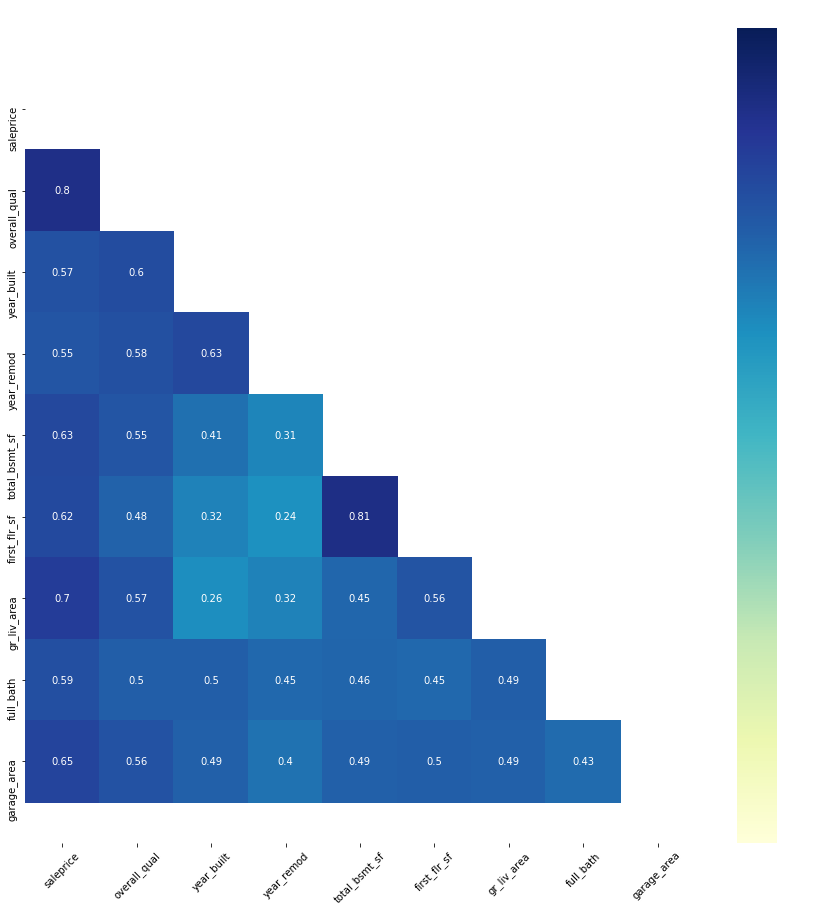

In [58]:
plt.figure(figsize=(15,15))
plt.title('Fig 1: Housing Data Correlation', color='white',fontsize=20)
mask = np.zeros(features.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.style.use('dark_background')
plt.xticks(rotation=45)
ax = sns.heatmap(features.corr(),mask=mask ,vmin = -1, vmax = 1, cmap="YlGnBu", center = 0, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)



In [59]:
corr1 = df.corr()['saleprice'] #array of correlation values for each variable vs. salePrice 
corr =corr1[np.abs(corr1) > 0.5]  # it returns correlation values greater than abs(0.5)
corr = pd.DataFrame(data=corr,columns= ['saleprice'])
corr = corr.drop_duplicates().sort_values('saleprice',ascending =False)
corr

,saleprice
saleprice,1.000000
overall_qual,0.800207
gr_liv_area,0.697038
garage_area,0.650270
garage_cars,0.648220
total_bsmt_sf,0.628668
first_flr_sf,0.618486
full_bath,0.587711
year_built,0.571849
year_remod,0.550370


# Plot Scatterplots between Top Correlated Variables

We observe the scatterplots between the most correlated variables and extract those with the strongest correlations.
<br>

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


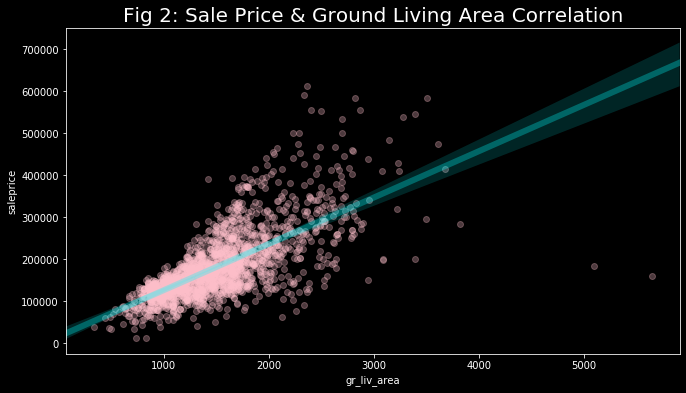

In [60]:
#We plot out those with the strongest correlations to saleprice

plt.style.use('dark_background')
plt.figure(figsize=(11,6))
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Fig 2: Sale Price & Ground Living Area Correlation',fontsize=20 )
sns.regplot(df.gr_liv_area, df.saleprice, data = df, scatter_kws = {'color': 'pink', 'alpha': 0.3}, line_kws = {'color': '#00FFFF', 'alpha': 0.3, 'lw':6})




**Sale Price and Ground Living Area Correlation**

We observe a positive linear relationship between Sale Price and Ground Living Area. This relationship gets weaker at higher Sale Price and higher Ground Living Area. We infer that size is an important factor that people are willing to pay for to achieve a level of comfort and liveable environment. However, dimishing utility sets in once a minimum size has been reached (around 2000 sq ft) as other factors may weigh greater in signicance. We note that the mean Ground Living Area is around 1499 sq ft which suggests that 1500sqft is a popular size.

Our advice is to focus efforts on redeveloping units not exceeding 2000sq ft, so that any excess budget can be spent on other value enhancing features to increase the potential selling price.



/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sum

Text(0.5, 1, 'Fig 3a: Sales Price & Overall Quality, 1st Flr Sqft, Total Basement Sqft Correlation')

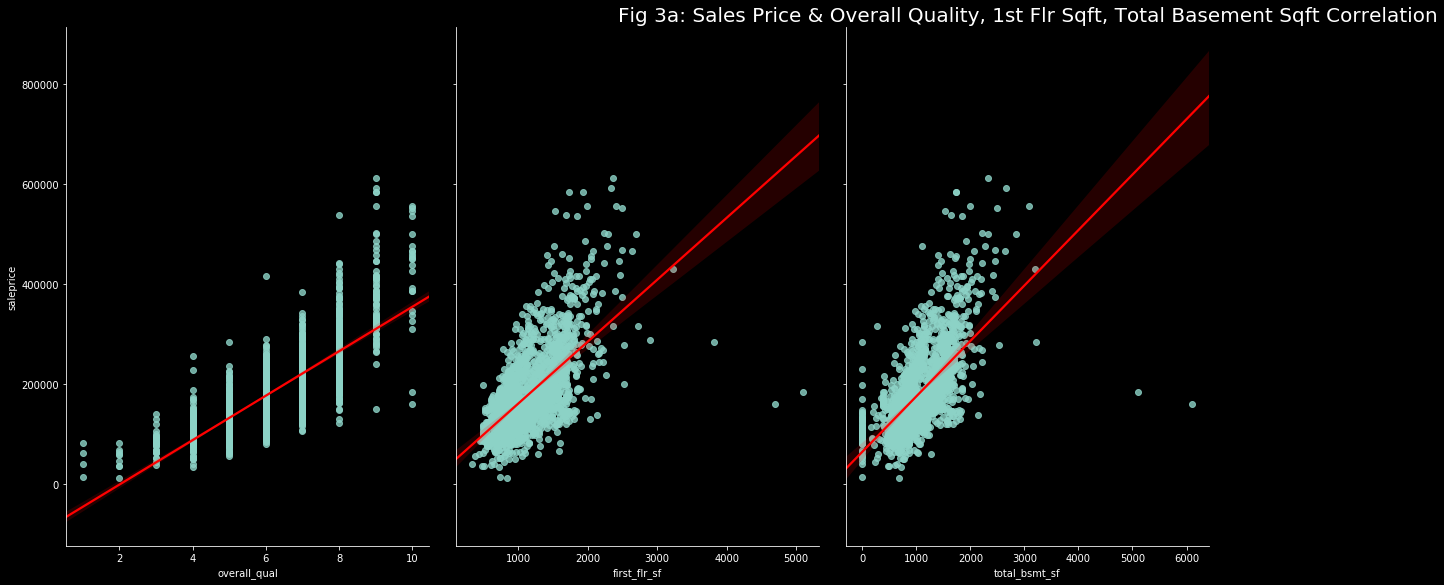

In [61]:

sns.pairplot(df,x_vars=['overall_qual','first_flr_sf','total_bsmt_sf'], y_vars=['saleprice'], size=8, aspect=0.7, kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.title('Fig 3a: Sales Price & Overall Quality, 1st Flr Sqft, Total Basement Sqft Correlation', fontsize=20)


/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sum

Text(0.5, 1, 'Fig 3b: Full Bath , Garage Area, Year Built,Year Remod Correlation')

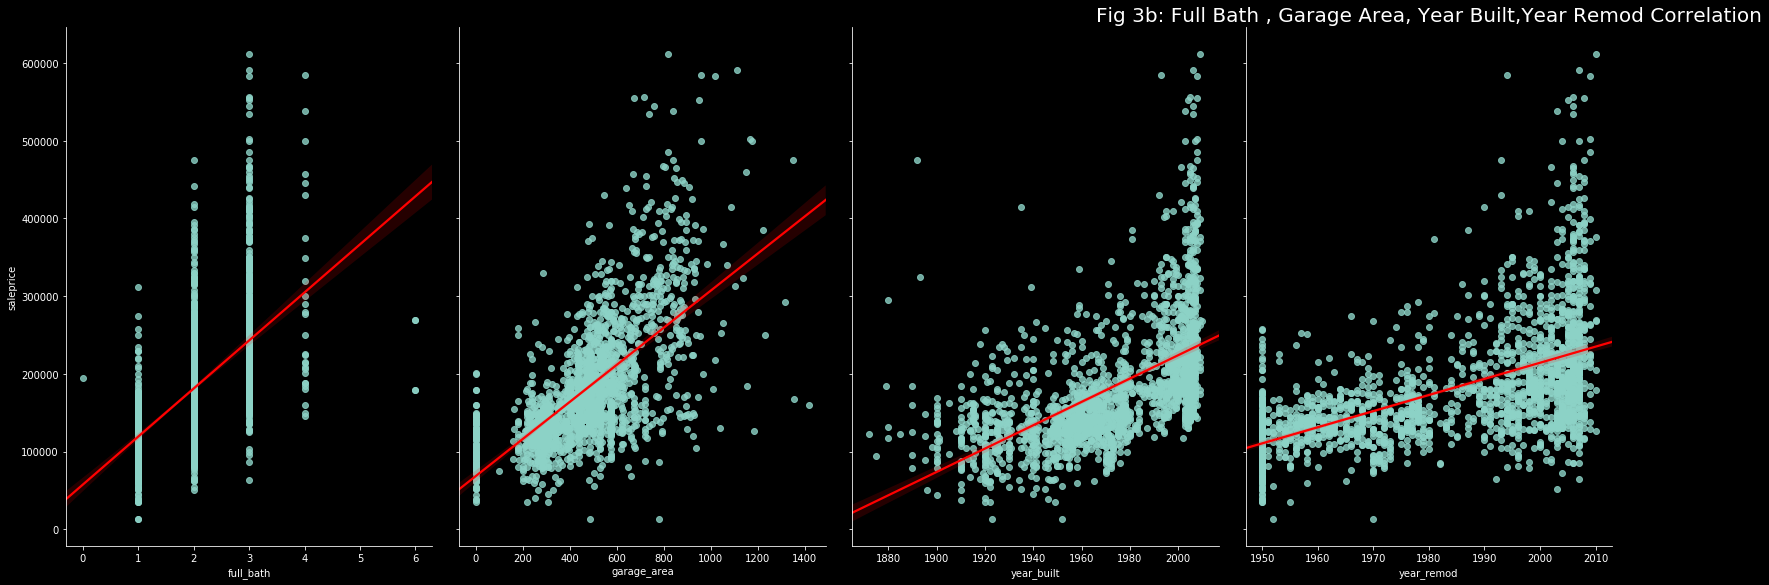

In [62]:
sns.pairplot(df,x_vars=['full_bath','garage_area','year_built','year_remod'], 
              y_vars=['saleprice'], size=8, aspect=0.7, kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.title('Fig 3b: Full Bath , Garage Area, Year Built,Year Remod Correlation', fontsize=20)



<br>
We observe a linear relationship between Sale Price  and Overall Quality, 1st Floor Sqft and Total BAsement Sqft .Hence as Overall Quality, 1st Floor Sqft and Total Basement increases, Sale Price also increases in a linear way.

There appears to be a less strong relationship between Garage Area and Sale Price beyond 800sqft. We surmise that beyond a certain size, the opportunity cost of having a larger garage increases as people face trade-offs in alternatives, such as having a larger wine cellar, home gym or more entertainment rooms.

We detect outliers at higher sqft and areas that may require attention and removal.

In summary as there there appears to be a fairly strong linear relationship between these features and the response variable (i.e saleprice), we will focusing first on the linear regression model before using Lasso and Ridge in out modelling.

<br>

# Feature Scaling of Sale Price & Top Correlated Variables
---

The continuous variables in our dataset are at varying scales. For instance if you refer to the histograms below, you can see that in Fig 4a the variable 'Sale prices in dollars' ranges from \\$12000 to \\$620000, whilst in Fig 4b, the variable '1st Floor sqft' ranges from 330sqft to 3300sqft. This poses a problem for our popular machine learning algorithms which uses Euclidian distance between data points to make the final predictions. Standardising the scale for these continuous variables will result in increased performance in our machine learning models. 

**We observe an improvement in skew after log scale conversion.**

<br>
We note from the original histograms that univariate distributions are skewed. Most of the histograms before transformation are right skewed. This could have resulted if data was gathered from a system with a boundary such as zero, whereby most collected data had values greater than zero.

We need to standardize the data so individual features are more normally distributed.

We have selected 4 variables (Sale Price, 1st Floor Sqft, Total Basement Sqft and Ground Living Area) to implement the log transformation. 

We will need to remove the 0 values from these variables first as log transformations cannot be applied to 0 or negative values.

<br>


### Improvement in Skew of Sales Price and other variables after Conversion to Log Scale

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Sales Price Skew is:1.5575514385863427


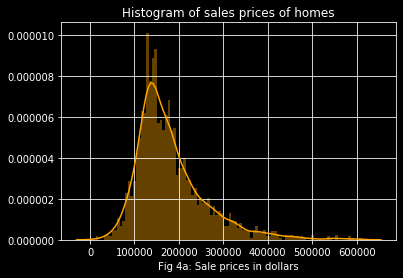

In [63]:

plt.figure(1, figsize=(6,4))
sns.distplot(df['saleprice'], 100, color = 'orange')
plt.xlabel("Fig 4a: Sale prices in dollars")
plt.title("Histogram of sales prices of homes")
plt.grid(True) 
print("Sales Price Skew is:{}".format(df.saleprice.skew()))

plt.show()


In [64]:
#We remove the 0 values in Sale Price
df_log = df.drop(df[df['saleprice']==0].index, axis =0)

In [65]:
#We implement log transformation on Sale Price
df_log.saleprice=np.log(df_log.saleprice)

### Less Skew and Improved Distibution of Home Sale Price
<br>


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


1st Flr Sqft Skew is:1.635145584982822


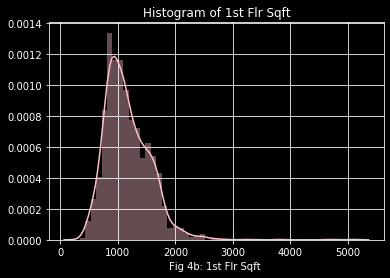

In [66]:
plt.figure(1, figsize=(6,4))
sns.distplot(df['first_flr_sf'],50, color ='pink')
plt.xlabel("Fig 4b: 1st Flr Sqft ")
plt.title("Histogram of 1st Flr Sqft")
plt.grid(True) 
print("1st Flr Sqft Skew is:{}".format(df.first_flr_sf.skew()))
plt.show()


In [67]:
#We remove the 0 values in First Floor Square Feet
df_log = df.drop(df[df['first_flr_sf']==0].index, axis =0)

In [68]:
#We implement log transformation on First Floor Square Feet
df_log.first_flr_sf=np.log(df_log.first_flr_sf)

### Lower Skew and Improved Distibution of 1st Flr Sqft
<br>

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


New Log 1st Flr Sqft Skew is:0.03289049194273151


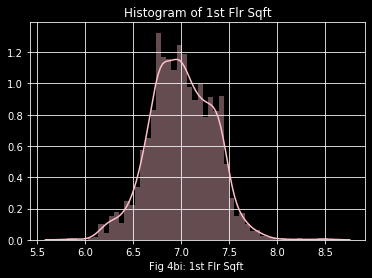

In [69]:
plt.figure(1, figsize=(6,4))
sns.distplot(df_log['first_flr_sf'],50, color ='pink')
plt.xlabel("Fig 4bi: 1st Flr Sqft ")
plt.title("Histogram of 1st Flr Sqft")
plt.grid(True) 
print("New Log 1st Flr Sqft Skew is:{}".format(df_log.first_flr_sf.skew()))
plt.show()


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Total Basement Sqft Skew is:1.3892508879891685


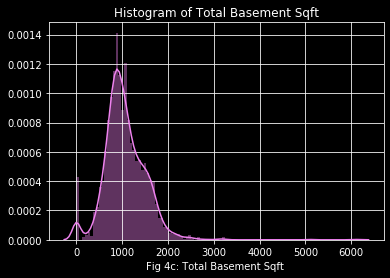

In [70]:
plt.figure(1, figsize=(6,4))
sns.distplot(df['total_bsmt_sf'],100, color ='violet')
plt.xlabel("Fig 4c: Total Basement Sqft ")
plt.title("Histogram of Total Basement Sqft")

print("Total Basement Sqft Skew is:{}".format(df.total_bsmt_sf.skew()))
plt.grid(True) 
plt.show()

In [71]:
#We remove the 0 values in Total Basement Sqft
df_log = df.drop(df[df['total_bsmt_sf']==0].index, axis =0)

In [72]:
#We implement log transformation on Total Basement Sqft
df_log.total_bsmt_sf=np.log(df_log.total_bsmt_sf)

### Lower Skew and Improved Distibution of Total Basement Sqft
<br>

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


New Log Total Basement Sqft Skew is:-0.3803428929308638


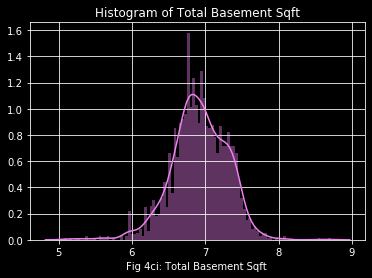

In [73]:
plt.figure(1, figsize=(6,4))
sns.distplot(df_log['total_bsmt_sf'],100, color ='violet')
plt.xlabel("Fig 4ci: Total Basement Sqft ")
plt.title("Histogram of Total Basement Sqft")
plt.grid(True) 
print("New Log Total Basement Sqft Skew is:{}".format(df_log.total_bsmt_sf.skew()))
plt.show()



/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Ground Living Area Skew is:1.2814915257403368


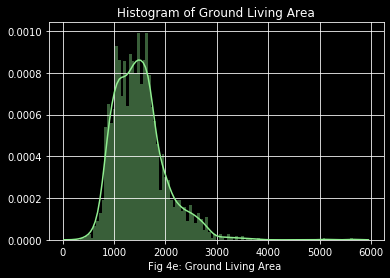

In [74]:
plt.figure(1, figsize=(6,4))
sns.distplot(df['gr_liv_area'],100, color ='lightgreen')
plt.xlabel("Fig 4e: Ground Living Area ")
plt.title("Histogram of Ground Living Area")

print("Ground Living Area Skew is:{}".format(df.gr_liv_area.skew()))
plt.grid(True) 
plt.show()

In [75]:
#We remove the 0 values in Ground Living Area
df_log = df.drop(df[df['gr_liv_area']==0].index, axis =0)

In [76]:
#We implement log transformation on Ground Living Area
df_log.total_bsmt_sf=np.log(df_log.gr_liv_area)


### Lower Skew and Improved Distibution of Ground Living Area
<br>

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


New Log Ground Living Area is:1.2814915257403368


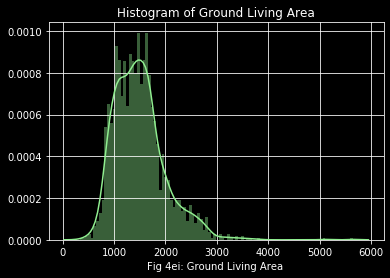

In [77]:
plt.figure(1, figsize=(6,4))
sns.distplot(df_log['gr_liv_area'],100, color ='lightgreen')
plt.xlabel("Fig 4ei: Ground Living Area ")
plt.title("Histogram of Ground Living Area")

print("New Log Ground Living Area is:{}".format(df_log.gr_liv_area.skew()))
plt.grid(True) 
plt.show()

# Removal of Outliers

While the boxplots of First Floor Sqft and Garage Area are fairly short indicating a high level of agreement on the ideal size amongst homeowners,there are also a number of outliers.



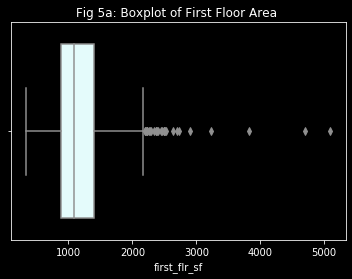

In [78]:
sns.boxplot(df_log['first_flr_sf'], color='lightcyan')
plt.title("Fig 5a: Boxplot of First Floor Area ")
plt.style.use('dark_background')
plt.show()

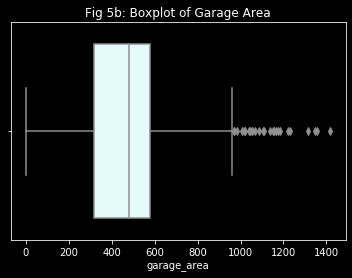

In [79]:
sns.boxplot(df_log['garage_area'], color='lightcyan')
plt.title("Fig 5b: Boxplot of Garage Area")
plt.style.use('dark_background')
plt.show()

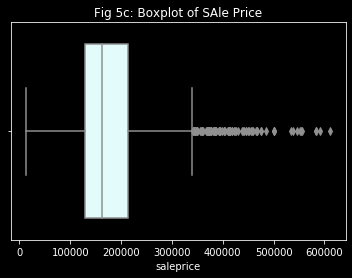

In [80]:
sns.boxplot(df_log['saleprice'], color='lightcyan')
plt.title("Fig 5c: Boxplot of SAle Price")
plt.style.use('dark_background')

**The following outliers identified below will be removed:**

The following houses were removed from the data:
Index 1035,1141,960,1885,616, 1712, 1327.

Removing these outliers also reduced potential outliers in more than 1 category
<br>

In [81]:
df_log[(df_log['saleprice']>300000) & (df_log['year_built']<1900)]

,id,pid,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,first_flr_sf,second_flr_sf,low_qual_fin_sf,gr_liv_area,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,pool_area,pool_qc,misc_feature,misc_val,mo_sold,yr_sold,saleprice,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Grvl,street_Pave,alley_0,alley_Grvl,alley_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,utilities_AllPub,utilities_NoSeWa,utilities_NoSewr,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,proximity_to_transport_Artery,proximity_to_transport_Feedr,proximity_to_transport_Norm,proximity_to_transport_PosA,proximity_to_transport_PosN,proximity_to_transport_RRAe,proximity_to_transport_RRAn,proximity_to_transport_RRNe,proximity_to_transport_RRNn,proximity_to_more_than_1_transport_Artery,proximity_to_more_than_1_transport_Feedr,proximity_to_more_than_1_transport_Norm,proximity_to_more_than_1_transport_PosA,proximity_to_more_than_1_transport_PosN,proximity_to_more_than_1_transport_RRAe,proximity_to_more_than_1_transport_RRAn,proximity_to_more_than_1_transport_RRNn,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_ClyTile,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_0,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtfin_type_1_0,bsmtfin_type_1_ALQ,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,bsmtfin_type_2_0,bsmtfin_type_2_ALQ,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_

In [82]:
df_log.drop([1035,1141],axis=0,inplace=True)

In [83]:
pd.options.display.max_rows = None
df_log[(df_log['saleprice']<300000) & (df_log['total_bsmt_sf']>5000)]

,id,pid,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,first_flr_sf,second_flr_sf,low_qual_fin_sf,gr_liv_area,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,pool_area,pool_qc,misc_feature,misc_val,mo_sold,yr_sold,saleprice,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Grvl,street_Pave,alley_0,alley_Grvl,alley_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,utilities_AllPub,utilities_NoSeWa,utilities_NoSewr,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,proximity_to_transport_Artery,proximity_to_transport_Feedr,proximity_to_transport_Norm,proximity_to_transport_PosA,proximity_to_transport_PosN,proximity_to_transport_RRAe,proximity_to_transport_RRAn,proximity_to_transport_RRNe,proximity_to_transport_RRNn,proximity_to_more_than_1_transport_Artery,proximity_to_more_than_1_transport_Feedr,proximity_to_more_than_1_transport_Norm,proximity_to_more_than_1_transport_PosA,proximity_to_more_than_1_transport_PosN,proximity_to_more_than_1_transport_RRAe,proximity_to_more_than_1_transport_RRAn,proximity_to_more_than_1_transport_RRNn,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_ClyTile,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_0,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtfin_type_1_0,bsmtfin_type_1_ALQ,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,bsmtfin_type_2_0,bsmtfin_type_2_ALQ,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_

In [84]:
df_log[(df_log['saleprice']<300000) & (df_log['total_bsmt_sf']>5000)]

,id,pid,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,first_flr_sf,second_flr_sf,low_qual_fin_sf,gr_liv_area,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,pool_area,pool_qc,misc_feature,misc_val,mo_sold,yr_sold,saleprice,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Grvl,street_Pave,alley_0,alley_Grvl,alley_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,utilities_AllPub,utilities_NoSeWa,utilities_NoSewr,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,proximity_to_transport_Artery,proximity_to_transport_Feedr,proximity_to_transport_Norm,proximity_to_transport_PosA,proximity_to_transport_PosN,proximity_to_transport_RRAe,proximity_to_transport_RRAn,proximity_to_transport_RRNe,proximity_to_transport_RRNn,proximity_to_more_than_1_transport_Artery,proximity_to_more_than_1_transport_Feedr,proximity_to_more_than_1_transport_Norm,proximity_to_more_than_1_transport_PosA,proximity_to_more_than_1_transport_PosN,proximity_to_more_than_1_transport_RRAe,proximity_to_more_than_1_transport_RRAn,proximity_to_more_than_1_transport_RRNn,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_ClyTile,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_0,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtfin_type_1_0,bsmtfin_type_1_ALQ,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,bsmtfin_type_2_0,bsmtfin_type_2_ALQ,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_

In [85]:
df_log.drop([960,1885],axis=0,inplace=True)

In [86]:
df_log[(df_log['saleprice']<300000) & (df_log['first_flr_sf']>3000)]

,id,pid,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,first_flr_sf,second_flr_sf,low_qual_fin_sf,gr_liv_area,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,pool_area,pool_qc,misc_feature,misc_val,mo_sold,yr_sold,saleprice,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Grvl,street_Pave,alley_0,alley_Grvl,alley_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,utilities_AllPub,utilities_NoSeWa,utilities_NoSewr,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,proximity_to_transport_Artery,proximity_to_transport_Feedr,proximity_to_transport_Norm,proximity_to_transport_PosA,proximity_to_transport_PosN,proximity_to_transport_RRAe,proximity_to_transport_RRAn,proximity_to_transport_RRNe,proximity_to_transport_RRNn,proximity_to_more_than_1_transport_Artery,proximity_to_more_than_1_transport_Feedr,proximity_to_more_than_1_transport_Norm,proximity_to_more_than_1_transport_PosA,proximity_to_more_than_1_transport_PosN,proximity_to_more_than_1_transport_RRAe,proximity_to_more_than_1_transport_RRAn,proximity_to_more_than_1_transport_RRNn,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_ClyTile,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_0,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtfin_type_1_0,bsmtfin_type_1_ALQ,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,bsmtfin_type_2_0,bsmtfin_type_2_ALQ,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_

In [87]:
df_log.drop([616],axis=0,inplace=True)

In [88]:
df_log[(df_log['saleprice']<300000) & (df_log['gr_liv_area']>5000)]

,id,pid,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,first_flr_sf,second_flr_sf,low_qual_fin_sf,gr_liv_area,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,pool_area,pool_qc,misc_feature,misc_val,mo_sold,yr_sold,saleprice,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Grvl,street_Pave,alley_0,alley_Grvl,alley_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,utilities_AllPub,utilities_NoSeWa,utilities_NoSewr,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,proximity_to_transport_Artery,proximity_to_transport_Feedr,proximity_to_transport_Norm,proximity_to_transport_PosA,proximity_to_transport_PosN,proximity_to_transport_RRAe,proximity_to_transport_RRAn,proximity_to_transport_RRNe,proximity_to_transport_RRNn,proximity_to_more_than_1_transport_Artery,proximity_to_more_than_1_transport_Feedr,proximity_to_more_than_1_transport_Norm,proximity_to_more_than_1_transport_PosA,proximity_to_more_than_1_transport_PosN,proximity_to_more_than_1_transport_RRAe,proximity_to_more_than_1_transport_RRAn,proximity_to_more_than_1_transport_RRNn,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_ClyTile,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_0,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtfin_type_1_0,bsmtfin_type_1_ALQ,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,bsmtfin_type_2_0,bsmtfin_type_2_ALQ,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_

In [89]:
pd.options.display.max_columns = None
df_log.loc[df_log['garage_area'].isnull(),:].head()

,id,pid,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,first_flr_sf,second_flr_sf,low_qual_fin_sf,gr_liv_area,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,pool_area,pool_qc,misc_feature,misc_val,mo_sold,yr_sold,saleprice,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Grvl,street_Pave,alley_0,alley_Grvl,alley_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,utilities_AllPub,utilities_NoSeWa,utilities_NoSewr,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,proximity_to_transport_Artery,proximity_to_transport_Feedr,proximity_to_transport_Norm,proximity_to_transport_PosA,proximity_to_transport_PosN,proximity_to_transport_RRAe,proximity_to_transport_RRAn,proximity_to_transport_RRNe,proximity_to_transport_RRNn,proximity_to_more_than_1_transport_Artery,proximity_to_more_than_1_transport_Feedr,proximity_to_more_than_1_transport_Norm,proximity_to_more_than_1_transport_PosA,proximity_to_more_than_1_transport_PosN,proximity_to_more_than_1_transport_RRAe,proximity_to_more_than_1_transport_RRAn,proximity_to_more_than_1_transport_RRNn,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_ClyTile,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_0,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtfin_type_1_0,bsmtfin_type_1_ALQ,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,bsmtfin_type_2_0,bsmtfin_type_2_ALQ,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_

In [90]:
df_log.drop([1712],axis=0,inplace=True)

In [91]:
df_log.loc[df['full_bath'].isnull(),:].head()

,id,pid,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,first_flr_sf,second_flr_sf,low_qual_fin_sf,gr_liv_area,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,pool_area,pool_qc,misc_feature,misc_val,mo_sold,yr_sold,saleprice,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Grvl,street_Pave,alley_0,alley_Grvl,alley_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,utilities_AllPub,utilities_NoSeWa,utilities_NoSewr,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,proximity_to_transport_Artery,proximity_to_transport_Feedr,proximity_to_transport_Norm,proximity_to_transport_PosA,proximity_to_transport_PosN,proximity_to_transport_RRAe,proximity_to_transport_RRAn,proximity_to_transport_RRNe,proximity_to_transport_RRNn,proximity_to_more_than_1_transport_Artery,proximity_to_more_than_1_transport_Feedr,proximity_to_more_than_1_transport_Norm,proximity_to_more_than_1_transport_PosA,proximity_to_more_than_1_transport_PosN,proximity_to_more_than_1_transport_RRAe,proximity_to_more_than_1_transport_RRAn,proximity_to_more_than_1_transport_RRNn,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_ClyTile,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_0,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtfin_type_1_0,bsmtfin_type_1_ALQ,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,bsmtfin_type_2_0,bsmtfin_type_2_ALQ,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_

In [92]:
df_log.drop([1327],axis=0,inplace=True)

# Further Data Exploration on Neighborhood as Location Variable
---

We look at the Neighborhood location as a variable affecting Sale Price.
<br>

### Calculation of % Sale Price = Sale Price/Total Sale Prices of Neighborhood

We look into Total Sales Prices of each Neighbourhood to understand the housing activity in each area both as a marketing point and assessment on the liquidity of housing as an asset, which could cause large fluctuations in asset price during an economic downturn. 

We are also interested in the Percent of Total Sales of each transaction to understand whether large Total Sale Prices of Neighborhood are a result of many or few transactions, as this would inform the likelihood of repeated transactions.


In [93]:
ames["totalsales_neigh"]=ames.groupby('neighborhood')["saleprice"].transform('sum')
ames["percent_of_total_sales_neigh"]=ames["saleprice"]/ames["totalsales_neigh"]

In [94]:
df_location=ames[['neighborhood','saleprice','totalsales_neigh', 'percent_of_total_sales_neigh']]
df_location.head()

,neighborhood,saleprice,totalsales_neigh,percent_of_total_sales_neigh
0,Sawyer,130500,15227192,0.008570
1,SawyerW,220000,16335134,0.013468
2,NAmes,109000,45230803,0.002410
3,Timber,174000,11570465,0.015038
4,SawyerW,138500,16335134,0.008479


### Mean Housing Price for Each Neighborhood

We look at average housing prices to compare the attractiveness of each neighborbood in terms of potential return on investment (ROI) and identify the following as the top 3 locations with the highest mean price:

- **Stone Brook**
- **Northridge**
- **Northridge Heights**


In [95]:
df_location.groupby('neighborhood')['saleprice'].mean().sort_values(ascending=False)
                                       

neighborhood
StoneBr    329675.736842
NridgHt    322831.352459
NoRidge    316294.125000
GrnHill    280000.000000
Veenker    253570.588235
Timber     241051.354167
Somerst    227183.900000
ClearCr    217490.074074
Crawfor    205901.211268
CollgCr    202497.216667
Blmngtn    200417.681818
NWAmes     194619.022989
Gilbert    189228.387931
Greens     188666.666667
SawyerW    187760.160920
Mitchel    167656.707317
NAmes      145905.816129
Blueste    144566.666667
NPkVill    140476.470588
Sawyer     137181.909910
Landmrk    137000.000000
SWISU      134758.875000
Edwards    130493.468531
BrkSide    127022.697368
OldTown    125276.300613
BrDale     103371.052632
IDOTRR     101103.188406
MeadowV    100231.250000
Name: saleprice, dtype: float64

# Scatterplot

We use a scatterplot to correlate Sale Price with Total Sales Per Neighborhood, to identify locations with more transactions, indicating a more active and liquid property market within these areas. In addition, we observe that the following are also the locations with the highest price transactions, increasing the marketability of redevelopments to buyers within these locations.

- **Stone Brook**
- **Northridge**
<br>


Text(0.5, 1, 'Fig 6: Sale Price, Neighborhood, Percent of Total Sales (Transaction Per Neighborhood) & Total Sales (Per Neighborhood)')

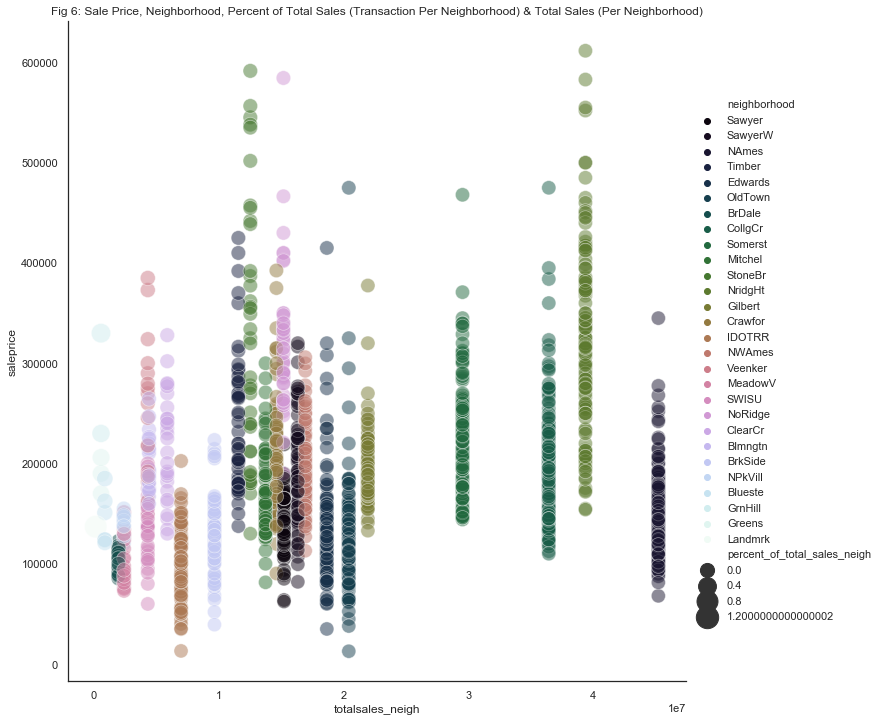

In [96]:
sns.set(style="white")
sns.relplot(x="totalsales_neigh", y="saleprice", hue="neighborhood", size="percent_of_total_sales_neigh",
            sizes=(200, 500), alpha=.5, palette="cubehelix",
            height=10, data=df_location)

plt.title("Fig 6: Sale Price, Neighborhood, Percent of Total Sales (Transaction Per Neighborhood) & Total Sales (Per Neighborhood)")

In [97]:
df_log.to_csv('cleaned_df.csv')

# Preprocessing
---

# Model Preparation 

**Creating matric (X) and target (y)**



In [98]:
features_2=df_log[['saleprice','overall_qual','year_remod','gr_liv_area', 'garage_area','gr_liv_area','full_bath']]

In [99]:
features_3=[col for col in features_2._get_numeric_data().columns if col!='saleprice']

In [100]:
#The features are 'saleprice','overall_qual','gr_liv_area', 'garage_area','year_remod','gr_liv_area', 'garage_area'
#The response variable is the 'saleprice'
#We create features matrix (X) and target vector (y)

X=df_log[features_3]
y=df_log['saleprice']


In [101]:
#Creating a matrix for untrained data from our test set.
X_testuntrain=df_test[features_3]


# Train Test Split Data

In [102]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

# Model Scaling


In [103]:
ss=StandardScaler()
ss.fit(X_train)
X_train=ss.transform(X_train)
X_test=ss.transform(X_test)



X_testuntrain_sc=ss.transform(X_testuntrain)

# Modelling

We will be using 3 models in our analysis before focusing on one.

We will first be using Linear Regression to quantify the relationshop in the data using R2, by using the least sum of squares to fit a line to the data. We will determine the reliability of this by calculating our p-value (with a smaller value indicating greater reliability). We have enough samples for the Linear Regression model to work well.

We will be selecting the best $R^2$ score model, which is the Ridge model to proceed with our finetuning and fitting. We note that Ridge regression will not fit the training data as well as Linear Regression as we will be introducing a small amount of bias to how the new line fits into the data. However, we believe that this increase in bias will lead to a fall in variance. Hence, although it starts off with worse fit for the training data, it can lead to better long term predictions.

By implementing Ridge modelling we will be not just minimizing the  sum of squared residuals but also adding $lambda*slope^2$. As the Ridge regression line has a smaller  slope Y it will be less responsive to changes in X. Predictions made with Ridge regression will be less sensitive to the variables on X axis than the least squares method. In considering the lambda, we note that the larger the size of lambda, the smaller the slope.

Aside from the $R^2$ score, we feel that Ridge Regression would be better suited than Linear Regression as our feature variables are less than 10 and small sample size can lead to poor predictions using least squared alone.

Although the $R^2$ scores of all 3 models are close, we will not be selecting Lasso regression. This is because our list of feature variables has already been narrowed down and carefully selected and we do not need the exclusion of irrelevant variables in the equation which Lasso can assist with. Since most of our variables are useful, Ridge regression would tend to work better.


**Instantiation of 3 models**

In [104]:
lr=LinearRegression()

In [105]:
lasso=LassoCV(n_alphas=200)

In [106]:
ridge=RidgeCV(alphas=np.linspace(.1,10,100))

# Cross Validation

We will use cross validation to evaluate all 3 models and select the one with the highest $R^2$ score

**Linear Regression**

In [107]:
lr_scores=cross_val_score(lr,X_train,y_train,cv=3)
lr_scores.mean()

0.7892833263836588

**Lasso**

In [108]:
lasso_scores=cross_val_score(lasso,X_train,y_train,cv=3)
lasso_scores.mean()

0.7890123384957161

**Ridge**

In [109]:
ridge_scores=cross_val_score(ridge,X_train,y_train,cv=3)
ridge_scores.mean()

0.7892921845038178

The $R^2$ score for Ridge is slightly better than for Lasso and Linear Regression. All scores are quite close and we will be selecting Ridge to proceed for model fitting and but also run other models for comparison.

# Model Fitting and Evaluation

**Finding an optimal value for Ridge regression alpha using RidgeCV**

In [110]:
Xs=ss.fit_transform(X)

ridge_alphas=np.logspace(0,5,200)

optimal_ridge=RidgeCV(alphas=ridge_alphas,cv=10)
optimal_ridge.fit(Xs,y)

print ("Optimal Ridge Alpha : {}".format(optimal_ridge.alpha_))

Optimal Ridge Alpha : 22.739657523579286


**Cross Validate the Ridge Regression $R^2$ with the optimal alpha**

In [111]:
ridge=Ridge(alpha=optimal_ridge.alpha_)

ridge_scores=cross_val_score(ridge,Xs,y, cv=10)

print ("Ridge R2 score:{}".format(ridge_scores))
print ("Ridge R2 score mean:{}".format(np.mean(ridge_scores)))

Ridge R2 score:[0.74617367 0.81363585 0.80295926 0.80334308 0.81125086 0.7822611
 0.81651612 0.79608488 0.78527377 0.78402126]
Ridge R2 score mean:0.7941519856765271


This is the best score so far. Ridge is likely to manage collinearity to achieve a better score.

**We will use the optimal alpha to fit into the Ridge model**


# Fitting the Ridge model to the training data

In [112]:
ridge.fit(X_train,y_train)

Ridge(alpha=22.739657523579286, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [113]:
ridge.score(X_train,y_train)

0.7923636543686918

In [114]:
ridge.score(X_test, y_test)

0.7977084762138961

In [115]:
ridge_scores.mean()

0.7941519856765271

In [116]:
pred=ridge.predict(X_test)

In [117]:
r2_score(y_test, pred)

0.7977084762138961

In [118]:
pred

array([107912.9132552 , 107772.01033604, 147802.05226253, 236342.02059552,
       308755.48227466, 166342.10674112, 358725.18541134, 168364.73018523,
       197280.39202423, 298999.40456183, 163758.57890741, 125455.29264339,
       203540.32494879, 217346.47900328, 214255.30692522, 188808.78366264,
       124390.17097141, 170535.24901078, 342509.40293138,  35462.68376576,
       205688.88036778, 162718.97101655, 182396.49325795, 315776.0181426 ,
       330941.79770631, 162406.71687692, 197978.97871455, 314902.77457092,
       109333.54570393, 112975.07922606, 295675.60454302, 192268.34834738,
       162812.38855102, 301480.38723244, 188991.03809714, 168861.54778742,
       106612.06143926, 267524.34573012, 368476.34959961, 224076.80433407,
        92511.56664444, 155168.30484669, 257996.29821518, 155990.5102294 ,
       129425.32697697, 223194.83627811, 213036.37970515,  59769.40801588,
       132265.49774413, 227369.38590748, 148876.64971015, 229740.83643196,
        94851.50772641, 1

In [136]:
y_pred=ridge.predict(X_testuntrain_sc)

The $R^2$ cross validation in the test set does not differ much from the train data set. We believe our model can generalize well with future data.

Hence, this model will be used to get the predictor y (saleprice).


In [120]:
residuals=y_test-pred


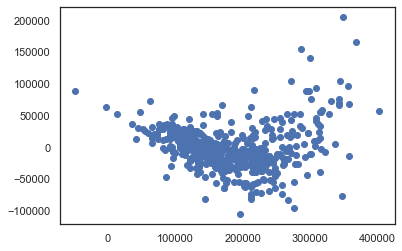

In [121]:
plt.scatter(pred,residuals)

# Fitting the Linear Regression model to the training data

In [122]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
lr.score(X_train,y_train)

0.7924102435138606

In [124]:
lr_scores.mean()

0.7892833263836588

In [125]:
pred=lr.predict(X_test)

In [126]:
r2_score(y_test,pred)

0.7979674321716531

In [127]:
pred=lr.predict(X_test)

In [128]:
pred

array([107695.35099242, 107780.94379186, 147563.14777595, 236448.86249771,
       309165.88508391, 166569.82394036, 360240.1744058 , 168143.90435547,
       196666.615132  , 300055.88283319, 164079.59920141, 125055.7337152 ,
       203282.74061011, 217467.73337386, 214421.97249605, 188202.89430091,
       124092.83761604, 170193.19075231, 343404.42337303,  35087.00590292,
       205879.34587516, 162697.91254867, 182113.43039777, 316822.03476238,
       331395.2915947 , 162490.95647383, 198397.66911746, 315332.22927021,
       109890.6461839 , 112760.01064966, 297046.31502589, 192504.8986933 ,
       162609.76140086, 302584.64541174, 188737.94890731, 169092.75356068,
       106609.63817865, 268176.61840748, 369817.43581819, 224247.69242787,
        92496.13945028, 155570.1199812 , 258621.04306529, 155705.9909836 ,
       128800.74372977, 223476.52647546, 212542.03047315,  58668.6032137 ,
       132159.00570657, 227832.92672204, 149423.11187483, 229906.4137344 ,
        94887.39392603, 1

# Fitting the Lasso model to the training data

In [129]:
lasso.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=200, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [130]:
lasso.score(X_train,y_train)

0.7924090968243317

In [131]:
lasso.score(X_test, y_test)

0.7979618339158712

In [132]:
lasso_scores.mean()

0.7890123384957161

In [133]:
pred=lasso.predict(X_test)

In [134]:
r2_score(y_test,pred)

0.7979618339158712

In [135]:
pred

array([107779.67126966, 107903.13306072, 147585.1126219 , 236372.53137686,
       309014.31613174, 166592.15437216, 360079.80921411, 168126.11568823,
       196600.59465616, 299941.98062126, 164123.08303878, 125123.03768134,
       203240.73683571, 217411.12600081, 214375.48001748, 188152.05003662,
       124183.36874445, 170198.29644569, 343245.80474134,  35280.75831353,
       205832.39989928, 162702.81294445, 182108.33668413, 316672.01207463,
       331225.04009472, 162504.98587394, 198390.68067389, 315178.14207644,
       110039.78081243, 112843.44582716, 296961.13014586, 192484.58058395,
       162635.28287725, 302485.92310628, 188709.44021973, 169137.27516351,
       106734.90779992, 268076.67600173, 369642.1332162 , 224194.5186763 ,
        92626.19274839, 155640.97356518, 258537.08854675, 155710.16357414,
       128816.4160065 , 223449.70454759, 212479.81143697,  58797.20449284,
       132231.45895642, 227807.55874654, 149508.75586791, 229827.38283058,
        95027.87803851, 1

In [139]:
ridge_pred

""


In [137]:
ridge_pred=pd.DataFrame()
ridge_pred['ID']=X_testuntrain_sc['id']
ridge_pred['saleprice']=pred



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [159]:
ridge_pred.to_csv('lasso_pred.csv', index=False)

In [160]:
ridge_pred

,ID
0,2658
1,2718
2,2414
3,1989
4,625
5,333
6,1327
7,858
8,95
9,1568


# Further Feature Engineering

In [240]:
#Removal of Certain Features

#We will now combine 1st Flr Sqft, Full Bath and Garage Area into one column to show total sqft of the house.
#We believe there is also overlap in Ground Living Area and the area of the house.

house_area= df_log['first_flr_sf'] + df_log['full_bath'] + df_log['total_bsmt_sf']

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


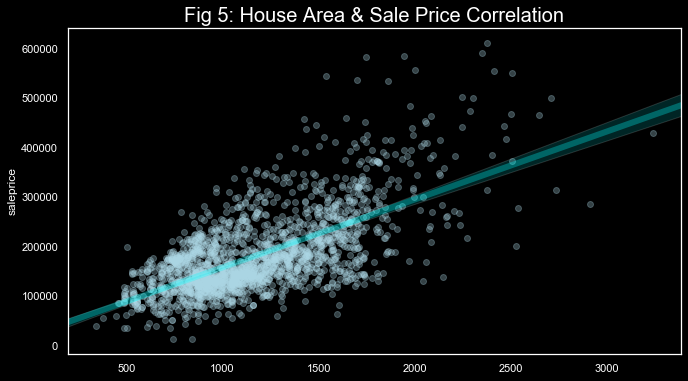

In [241]:
plt.style.use('dark_background')
plt.figure(figsize=(11,6))
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Fig 5: House Area & Sale Price Correlation',fontsize=20 )
sns.regplot(house_area, df_log.saleprice, data = df_log, scatter_kws = {'color': 'lightblue', 'alpha': 0.3}, line_kws = {'color': '#00FFFF', 'alpha': 0.3, 'lw':6})



In [242]:
# bins = [0, 100, 200, 400, 600 ,800, 1000]
# labels = ["low","me","excellent"]
# student['grade_cat'] = pd.cut(student['grade'], bins=bins, labels=labels)

In [243]:
ss=StandardScaler()
ss.fit(X_train)
Xtrain=ss.transform(X_train)
X_test=ss.transform(X_test)

In [244]:
Xs=ss.fit_transform(X)

In [169]:
ridge_alphas=np.logspace(0,5,200)


In [208]:
optimal_ridge=RidgeCV(alphas=ridge_alphas, cv=10)

In [209]:
optimal_ridge.fit(Xs,y)

RidgeCV(alphas=array([1.00000e+00, 1.05956e+00, ..., 9.43788e+04, 1.00000e+05]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [212]:
print (optimal_ridge.alpha_)

19.116440753857027


In [ ]:
# bins = [30, 40, 50, 60, 70, 80]
# group_names = ['30-39', '40-49', '50-59', '60-69', '70-79']
# age_categories = pd.cut(train['age'], bins, labels=group_names)
# train['age_categories'] = pd.cut(train['age'], bins, labels=group_names)
# age_categories
# pd.value_counts(train['age_categories'])

In [228]:
X_testuntrain_sc.shape

(879, 6)

In [232]:
X_train.shape

(1533, 6)